In [1]:
# Import required libraries for EDA and Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from math import radians, cos, sin, asin, sqrt
from scipy import stats

# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
# Read the dataset
df = pd.read_csv('TelecomChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.shape)
print(df.customerID.unique().shape)

(7043, 21)
(7043,)


In [5]:
# Check if null values exist in any of the columns
(df.astype(np.object).isnull()).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
del df['customerID']

In [7]:
df[df.TotalCharges == " "].shape[0]

11

In [8]:
df['TotalCharges'] = df["TotalCharges"].replace(" ", np.nan)

In [9]:
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [10]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes", 0:"No"})

In [11]:
# Check the column data types
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [13]:
df_churn = df[df['Churn'] == "Yes"]
df_notchurn = df[df['Churn'] == "No"]

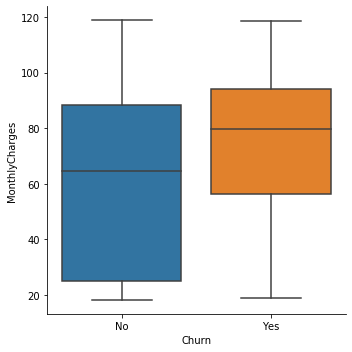

In [14]:
sns.factorplot(x = 'Churn', y = 'MonthlyCharges', data = df,  kind="box")

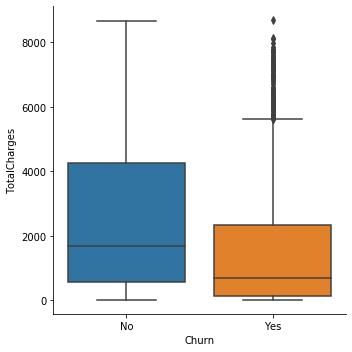

In [15]:
sns.factorplot(x = 'Churn', y = 'TotalCharges', data = df,  kind="box")

<Figure size 1080x360 with 0 Axes>

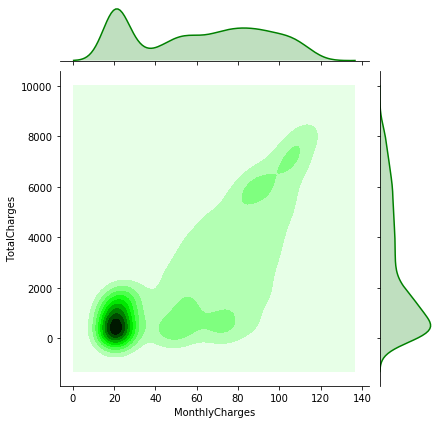

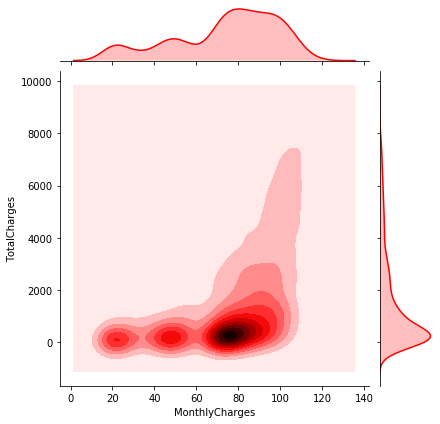

In [16]:
sns.jointplot(x = "MonthlyCharges", y = "TotalCharges", data = df_notchurn, color = "g", kind = "kde")
sns.jointplot(x = "MonthlyCharges", y = "TotalCharges", data = df_churn, color = "r", kind = "kde")

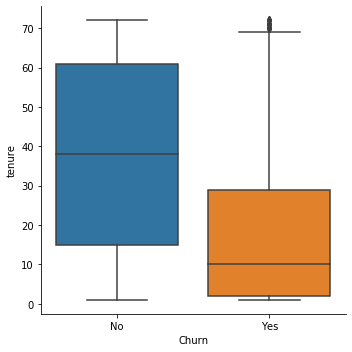

In [17]:
sns.factorplot(x = 'Churn', y = 'tenure', data = df,  kind="box")

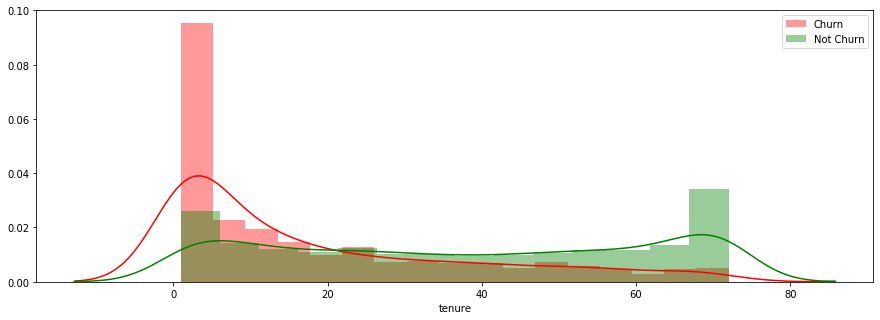

In [18]:
plt.figure(figsize=(15, 5))
sns.distplot(df_churn['tenure'], color = "r", label = "Churn")
sns.distplot(df_notchurn['tenure'], color = "g", label = "Not Churn")
plt.legend()

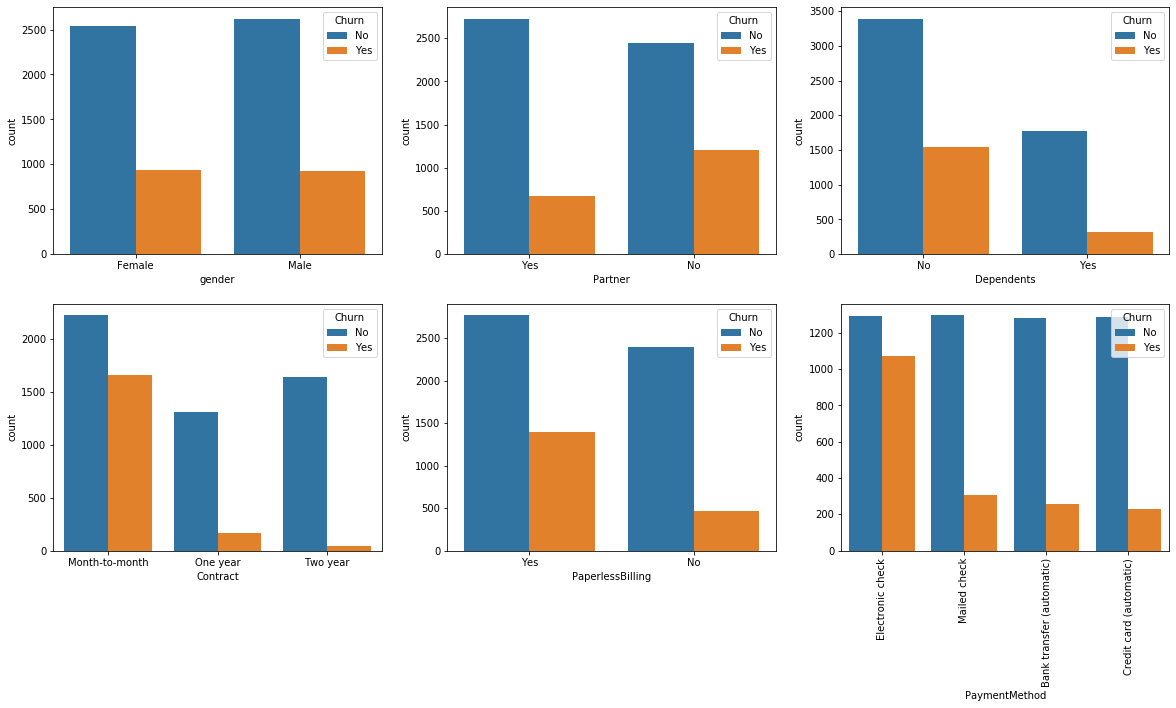

In [19]:
fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (20,10))
sns.countplot(x = "gender", hue = 'Churn', data = df, ax=axes[0][0])
sns.countplot(x = "Partner", hue = 'Churn', data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", hue = 'Churn', data = df, ax=axes[0][2])
sns.countplot(x = "Contract", hue = 'Churn', data = df, ax=axes[1][0])
sns.countplot(x = "PaperlessBilling", hue = 'Churn', data = df, ax=axes[1][1])
ax = sns.countplot(x = "PaymentMethod", hue = 'Churn', data = df, ax=axes[1][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

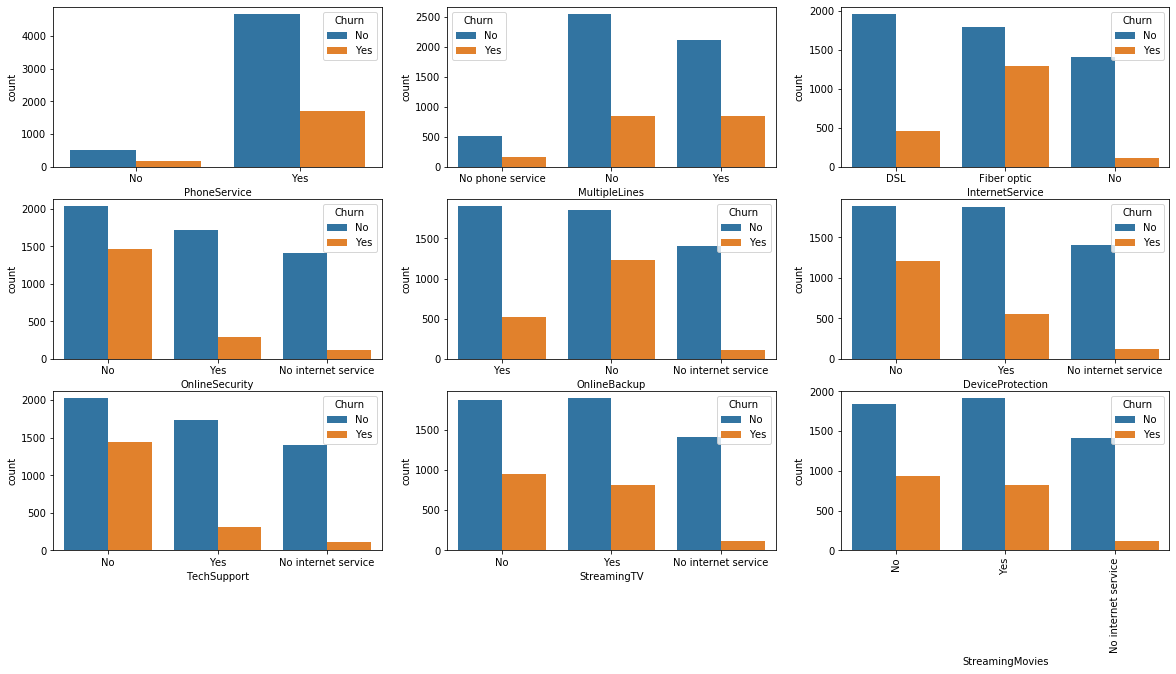

In [20]:
fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (20,10))
sns.countplot(x = "PhoneService", hue = 'Churn', data = df, ax=axes[0][0])
sns.countplot(x = "MultipleLines", hue = 'Churn', data = df, ax=axes[0][1])
sns.countplot(x = "InternetService", hue = 'Churn', data = df, ax=axes[0][2])
sns.countplot(x = "OnlineSecurity", hue = 'Churn', data = df, ax=axes[1][0])
sns.countplot(x = "OnlineBackup", hue = 'Churn', data = df, ax=axes[1][1])
sns.countplot(x = "DeviceProtection", hue = 'Churn', data = df, ax=axes[1][2])
sns.countplot(x = "TechSupport", hue = 'Churn', data = df, ax=axes[2][0])
sns.countplot(x = "StreamingTV", hue = 'Churn', data = df, ax=axes[2][1])
ax = sns.countplot(x = "StreamingMovies", hue = 'Churn', data = df, ax=axes[2][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

In [21]:
def count_internet_services(row):
    internet_services_cols = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
    count = 0
    for col in internet_services_cols:
        if row[col] == "Yes":
            count += 1
    return count

df["NumInternetServices"] = df.apply(count_internet_services, axis = 1)

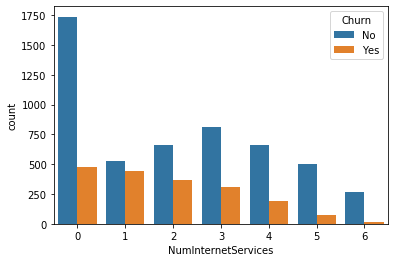

In [22]:
sns.countplot(x = "NumInternetServices", hue = 'Churn', data = df)

In [23]:
# Check the number of unique values in all columns
for col in df.columns:
    count = df[col].unique().shape[0]
    print(col + ': ' + str(count))

gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 72
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1584
TotalCharges: 6530
Churn: 2
NumInternetServices: 7


In [24]:
label = ['Churn']

In [25]:
cat = []
for col in df.columns:
    if (df[col].dtype == 'object') & (col != 'Churn'):
        cat.append(col)

In [26]:
num = []
for col in df.columns:
    if (col not in cat) & (col not in label):
        num.append(col)

In [27]:
from sklearn import preprocessing
    
for col in num:
    x = df[col].values.reshape(-1, 1)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df[col] = pd.DataFrame(x_scaled)

In [28]:
df = pd.get_dummies(df, columns = cat)

In [29]:
df['Churn'] = df['Churn'].replace({"Yes":1, "No":0})

In [30]:
df

,tenure,MonthlyCharges,TotalCharges,Churn,NumInternetServices,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0,0.166667,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.464789,0.385075,0.215867,0,0.333333,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.014085,0.354229,0.010310,1,0.333333,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.619718,0.239303,0.210241,0,0.500000,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.014085,0.521891,0.015330,1,0.000000,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,0.227521,0,0.833333,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
7028,1.000000,0.845274,0.847461,0,0.666667,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
7029,0.140845,0.112935,0.037809,0,0.166667,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
7030,0.042254,0.558706,0.033210,1,0.000000,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [31]:
label = np.array(df['Churn'])

In [32]:
features = np.array(df.drop(['Churn'], axis = 1))

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, label, stratify = label, test_size=0.25)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [37]:
classifiers = [['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['SVM:', SVC()],
               ['LogisticRegression:', LogisticRegression()],
               ['ExtraTreesClassifier:', ExtraTreesClassifier()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB:', XGBClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'weighted')
    scores = cross_val_score(classifier, X_test, y_test, cv=10)
    print(f"{name} Accuracy - {accuracy:.4f}, CV Score - {scores.mean():.4f}, Precision - {precision:.4f}, Recall - {recall:.4f}, F1 - {f1:.4f}")

DecisionTree: Accuracy - 0.7292, CV Score - 0.7246, Precision - 0.4908, Recall - 0.5118, F1 - 0.7310
RandomForest: Accuracy - 0.7793, CV Score - 0.7827, Precision - 0.6053, Recall - 0.4861, F1 - 0.7710
Naive Bayes: Accuracy - 0.6877, CV Score - 0.6923, Precision - 0.4528, Recall - 0.8415, F1 - 0.7059
KNeighbours: Accuracy - 0.7554, CV Score - 0.7645, Precision - 0.5371, Recall - 0.5739, F1 - 0.7579
SVM: Accuracy - 0.7975, CV Score - 0.7833, Precision - 0.6472, Recall - 0.5225, F1 - 0.7901
LogisticRegression: Accuracy - 0.8043, CV Score - 0.7901, Precision - 0.6496, Recall - 0.5717, F1 - 0.8002
ExtraTreesClassifier: Accuracy - 0.7668, CV Score - 0.7793, Precision - 0.5736, Recall - 0.4754, F1 - 0.7594
AdaBoostClassifier: Accuracy - 0.7952, CV Score - 0.7873, Precision - 0.6404, Recall - 0.5225, F1 - 0.7881
GradientBoostingClassifier:  Accuracy - 0.7952, CV Score - 0.7901, Precision - 0.6427, Recall - 0.5161, F1 - 0.7876
XGB: Accuracy - 0.7856, CV Score - 0.7747, Precision - 0.6082, Reca

In [38]:
from imblearn.over_sampling import SMOTE

features_resampled, label_resampled = SMOTE().fit_resample(features, label)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features_resampled, label_resampled, stratify = label_resampled, test_size=0.25)

In [40]:
classifiers = [['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['SVM:', SVC()],
               ['LogisticRegression:', LogisticRegression()],
               ['ExtraTreesClassifier:', ExtraTreesClassifier()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB:', XGBClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'weighted')
    scores = cross_val_score(classifier, X_test, y_test, cv=10)
    print(f"{name} Accuracy - {accuracy:.4f}, CV Score - {scores.mean():.4f}, Precision - {precision:.4f}, Recall - {recall:.4f}, F1 - {f1:.4f}")

DecisionTree: Accuracy - 0.7924, CV Score - 0.7498, Precision - 0.7902, Recall - 0.7963, F1 - 0.7924
RandomForest: Accuracy - 0.8493, CV Score - 0.8063, Precision - 0.8396, Recall - 0.8637, F1 - 0.8493
Naive Bayes: Accuracy - 0.7545, CV Score - 0.7544, Precision - 0.7160, Recall - 0.8435, F1 - 0.7525
KNeighbours: Accuracy - 0.7858, CV Score - 0.7517, Precision - 0.7318, Recall - 0.9024, F1 - 0.7829
SVM: Accuracy - 0.8079, CV Score - 0.7877, Precision - 0.7978, Recall - 0.8249, F1 - 0.8078
LogisticRegression: Accuracy - 0.7754, CV Score - 0.7664, Precision - 0.7556, Recall - 0.8141, F1 - 0.7750
ExtraTreesClassifier: Accuracy - 0.8524, CV Score - 0.8056, Precision - 0.8411, Recall - 0.8691, F1 - 0.8524
AdaBoostClassifier: Accuracy - 0.8203, CV Score - 0.8083, Precision - 0.7939, Recall - 0.8652, F1 - 0.8199
GradientBoostingClassifier:  Accuracy - 0.8451, CV Score - 0.8373, Precision - 0.8259, Recall - 0.8745, F1 - 0.8449
XGB: Accuracy - 0.8548, CV Score - 0.8373, Precision - 0.8534, Reca

In [47]:
from sklearn.metrics import classification_report

classifier = ExtraTreesClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
predictions_df[name.strip(" :")] = predictions
target_names = ['Not Churn', 'Churn']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

   Not Churn       0.87      0.84      0.85      1291
       Churn       0.84      0.87      0.86      1291

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



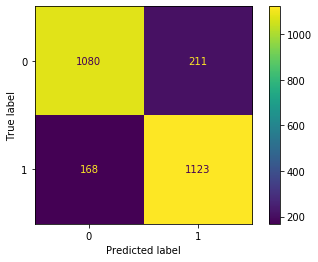

In [48]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test)

plt.show()

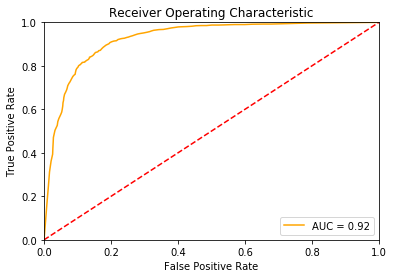

In [49]:
probabilities = classifier.predict_proba(X_test)

from sklearn.metrics import roc_curve, auc

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = roc_curve(labels, probs[:,1])
    auc_score = auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc_score)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  

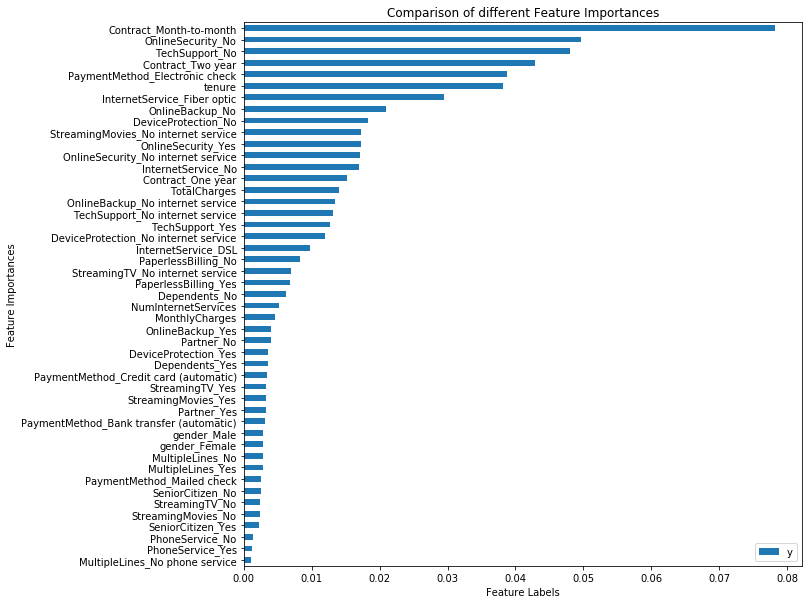

In [50]:
feature_importance = classifier.feature_importances_ 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        classifier.estimators_], 
                                        axis = 0) 

plot_df = pd.DataFrame({'X' : df.drop(['Churn'], axis = 1).columns, 'y' : feature_importance_normalized})
plot_df = plot_df.sort_values('y')

fig, ax = plt.subplots()
plot_df.plot(kind='barh', x='X', y='y', ax=ax, figsize = (10,10))
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 